## You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:
   ### • jupyter notebook with analysis; 
   ### • code for modeling (Python 3); 
   ### • file with model predictions; 
   ### • readme file;
   ### • requirements.txt file.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#readind in printing out our data
df = pd.read_csv("internship_train.csv")


In [3]:
# checking for what type of data we are working with and how much of it is there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [4]:
#checking every column for range of values (min-max), standard deviation and 
df.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [252]:
#detecting mssing values 
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

In [253]:
#checking for dublicate instances. if any - drop them
df = df.drop_duplicates()
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


### EDA

In [254]:
#creating a sample subset of 100 instances
df_sample = df.sample(n=100, random_state=99)
df_sample

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
65445,232,193,133,377,157,178,7.071068,0.852405,1,466,...,5.794526,7.219628,4.057738,7.701131,6.824060,0.553296,14.191313,9.196106,3.901126,50.852405
13536,336,383,90,276,205,379,7.874008,0.637622,1,82,...,9.706696,4.384611,6.508137,8.510181,8.967001,13.145779,8.244738,7.864158,7.436562,62.637622
13396,396,369,169,223,126,109,-6.708204,0.120759,0,333,...,10.195026,7.425276,9.573246,0.412330,5.168763,8.989226,9.439624,0.227373,14.159026,45.120759
11878,471,128,137,365,373,262,-7.810250,0.862464,0,432,...,3.432742,8.260212,14.535169,9.694030,2.248031,5.730543,8.745624,1.096980,11.219070,61.862464
82889,227,43,164,475,46,371,-0.000000,0.475058,0,442,...,4.368404,9.159007,14.249340,13.906422,5.806004,4.523323,2.465526,13.549077,10.373274,0.475058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17320,139,67,417,92,304,182,-8.831761,0.800354,0,346,...,5.006981,3.064946,1.473177,14.510306,13.167682,3.131175,0.207238,14.920596,0.179308,78.800354
44748,243,133,258,218,404,431,9.949874,0.531644,1,298,...,10.705368,3.110857,7.482786,9.688118,8.301950,2.233453,7.774121,5.461895,9.049749,99.531644
39771,130,310,386,68,381,408,-9.949874,0.228589,0,356,...,11.504593,2.656308,13.330459,3.422118,10.411660,1.682639,10.373142,6.316219,9.221123,99.228589
2523,168,318,115,60,462,207,-4.690416,0.160396,0,94,...,5.112524,1.072373,0.604249,1.198621,0.076348,6.166947,6.427330,9.436929,8.577774,22.160396


In [223]:
#batching our sample subset by columns (4 features columns + "target" column  )

total_cols_num = 53
target_col_idx = 53
col_chunk = 4
batch_num = int(total_cols_num / col_chunk)
col_sets = []

for i in range(batch_num):
    range_start = i*col_chunk
    range_end = (i+1)*col_chunk
    
    if (i == batch_num - 1):
        range_end = total_cols_num

    col_set = df_sample.iloc[:, np.r_[range_start:range_end, target_col_idx]]
    col_sets.append(col_set)

col_sets[12] #printing the 12th(last) batch 

,48,49,50,51,52,target
65445,6.824060,0.553296,14.191313,9.196106,3.901126,50.852405
13536,8.967001,13.145779,8.244738,7.864158,7.436562,62.637622
13396,5.168763,8.989226,9.439624,0.227373,14.159026,45.120759
11878,2.248031,5.730543,8.745624,1.096980,11.219070,61.862464
82889,5.806004,4.523323,2.465526,13.549077,10.373274,0.475058
...,...,...,...,...,...,...
17320,13.167682,3.131175,0.207238,14.920596,0.179308,78.800354
44748,8.301950,2.233453,7.774121,5.461895,9.049749,99.531644
39771,10.411660,1.682639,10.373142,6.316219,9.221123,99.228589
2523,0.076348,6.166947,6.427330,9.436929,8.577774,22.160396


In [225]:
#checking if batching works accurately 
batch_num

13

Chunk in progress:  0
Chunk in progress:  1
Chunk in progress:  2
Chunk in progress:  3
Chunk in progress:  4
Chunk in progress:  5
Chunk in progress:  6
Chunk in progress:  7
Chunk in progress:  8
Chunk in progress:  9
Chunk in progress:  10
Chunk in progress:  11
Chunk in progress:  12


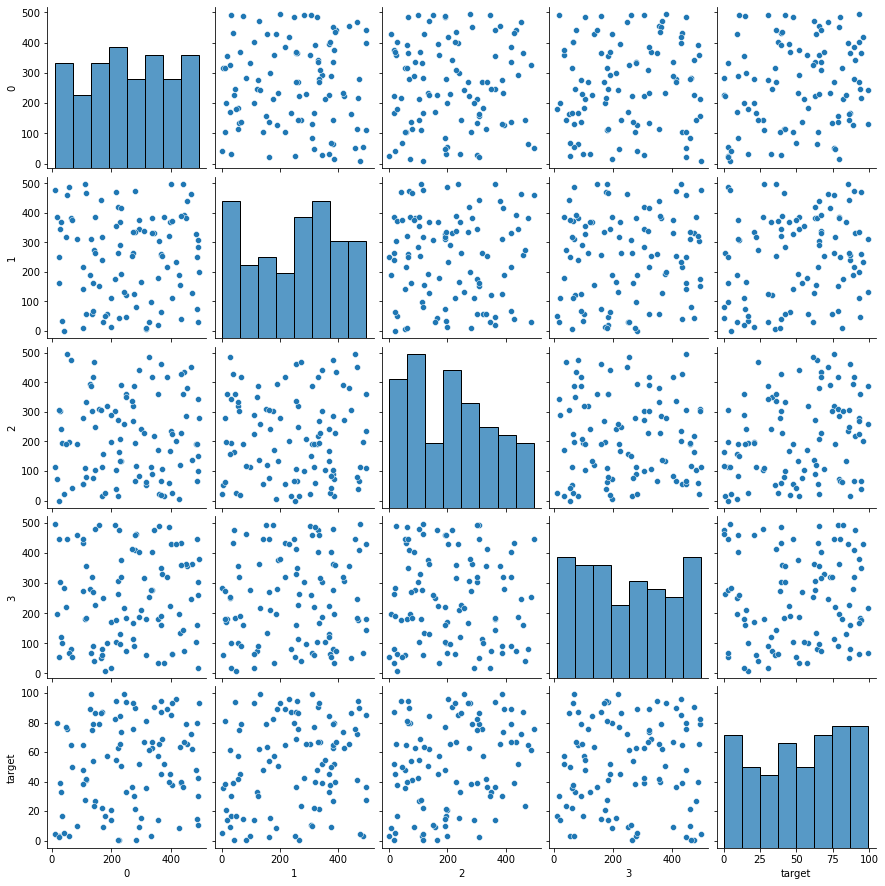

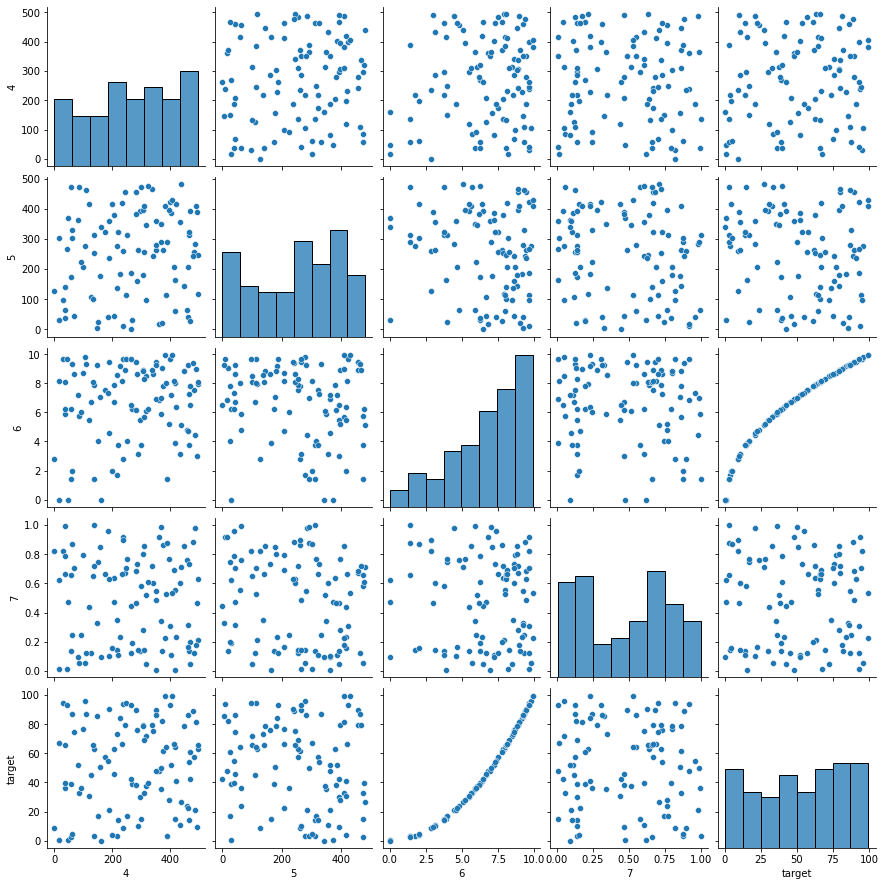

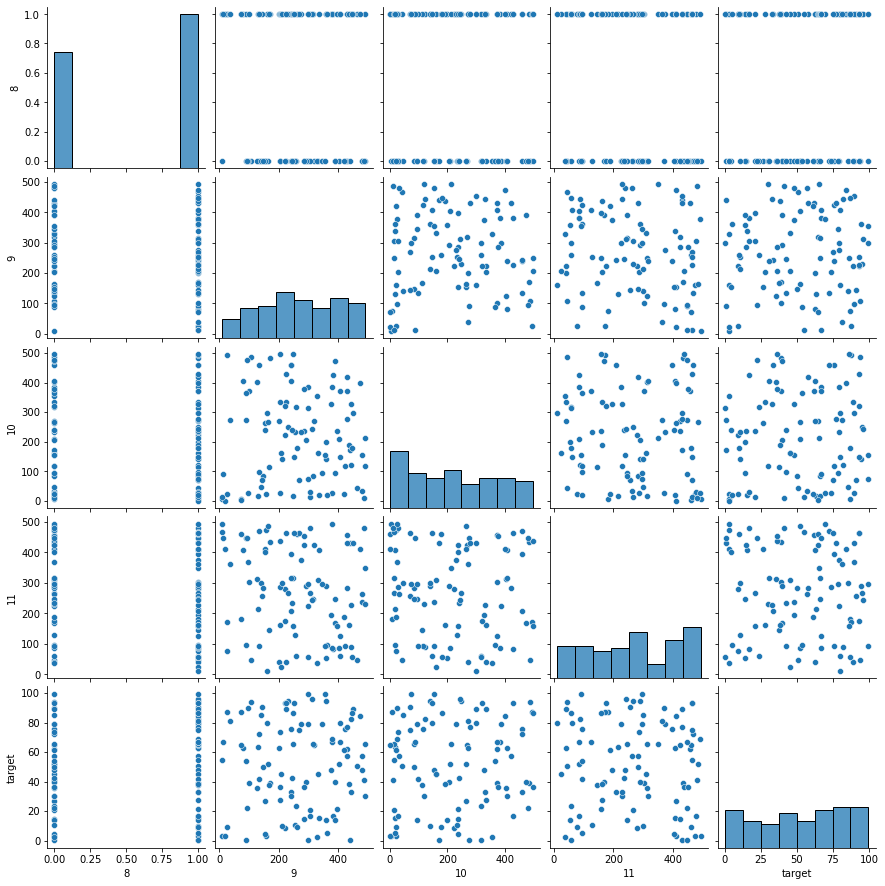

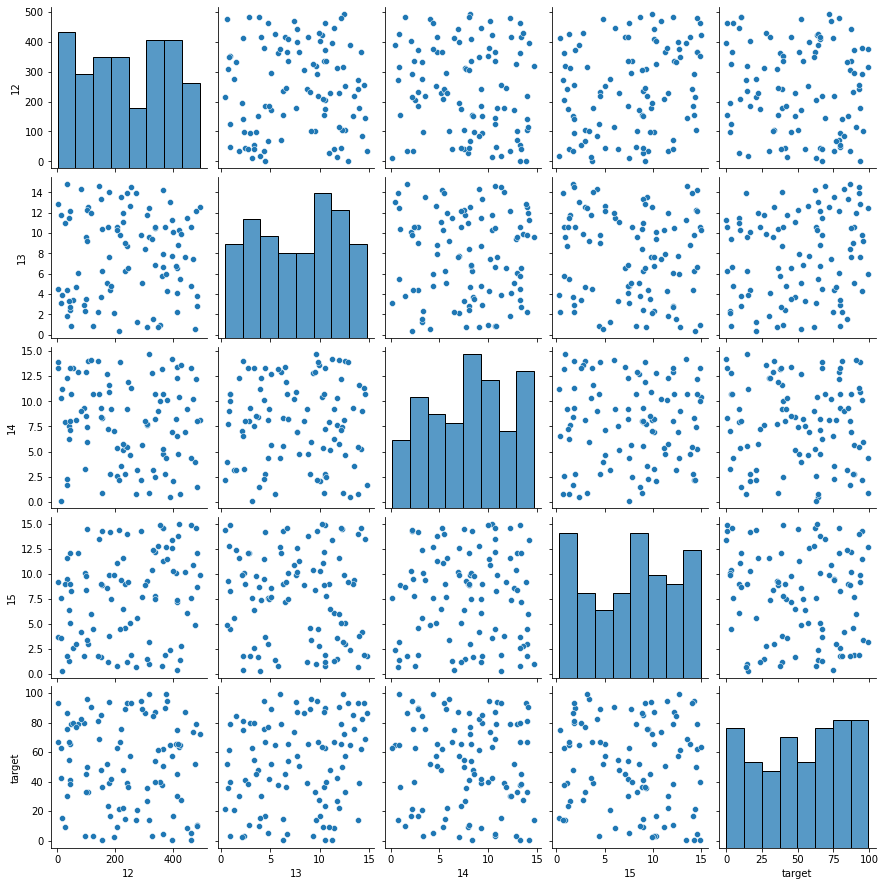

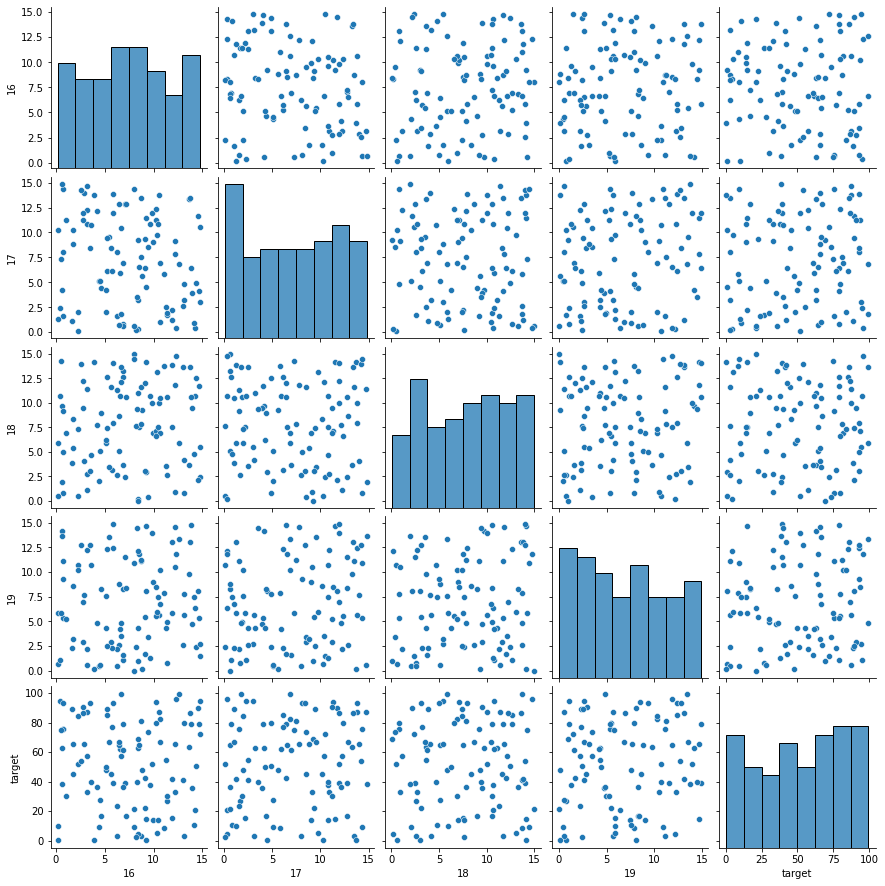

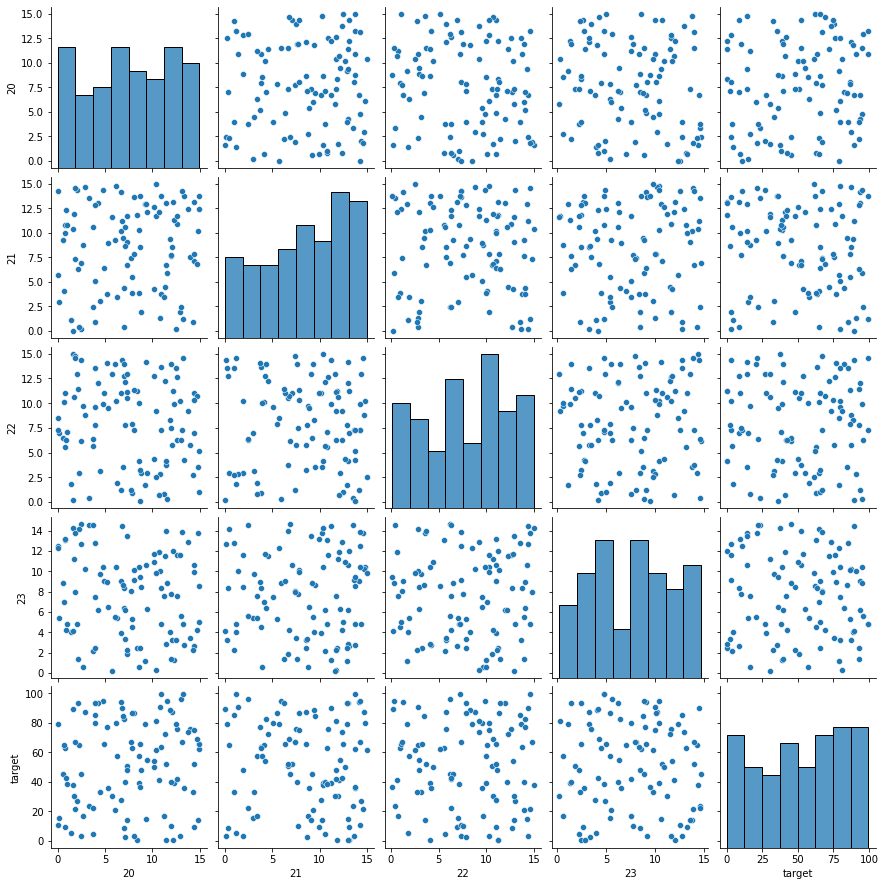

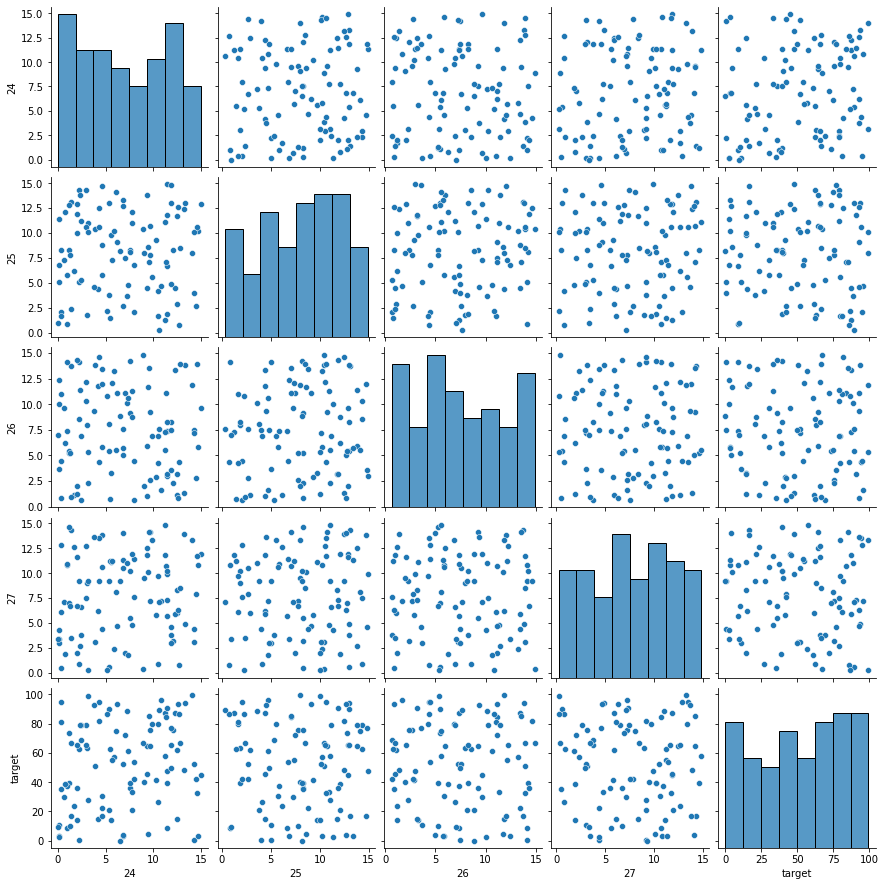

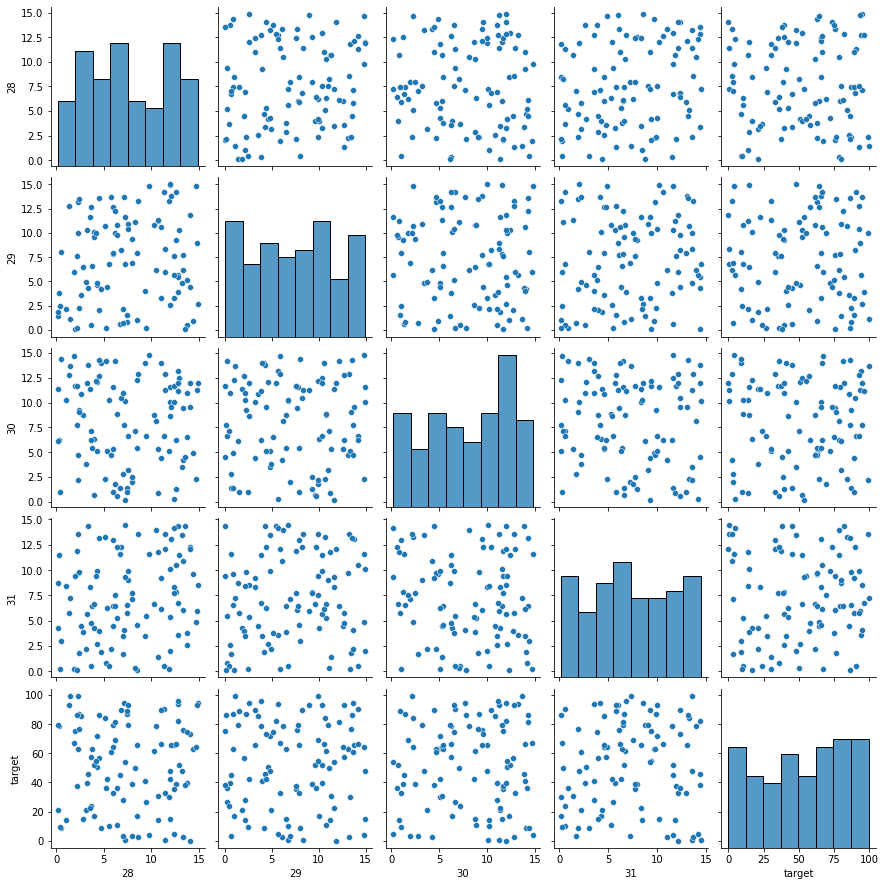

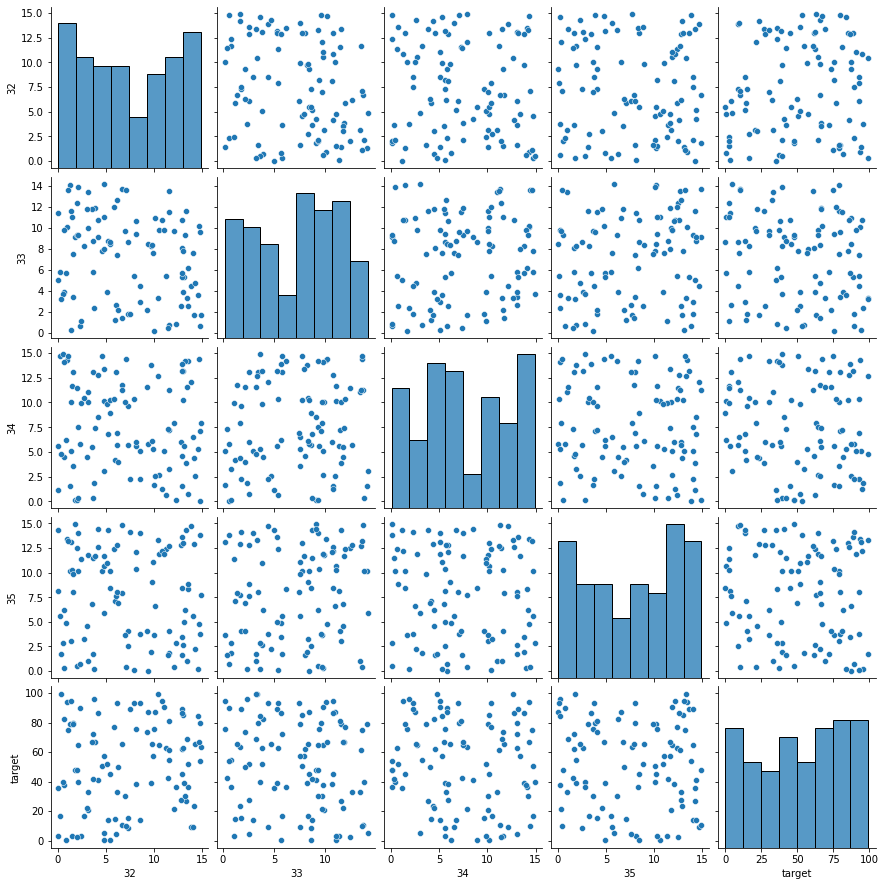

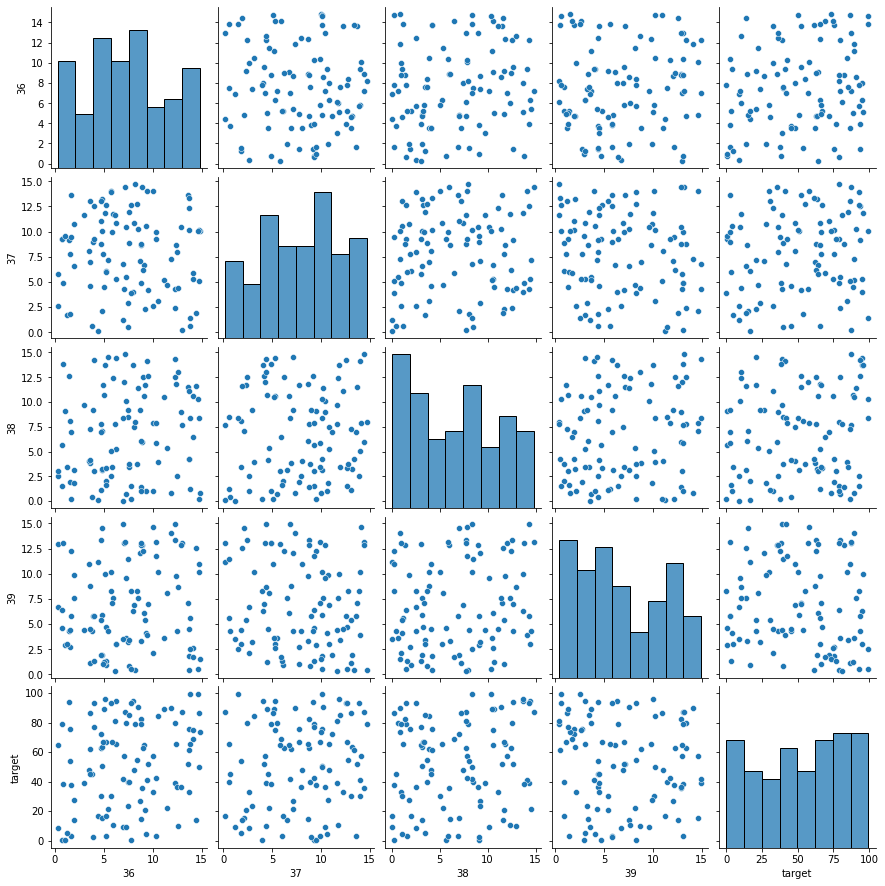

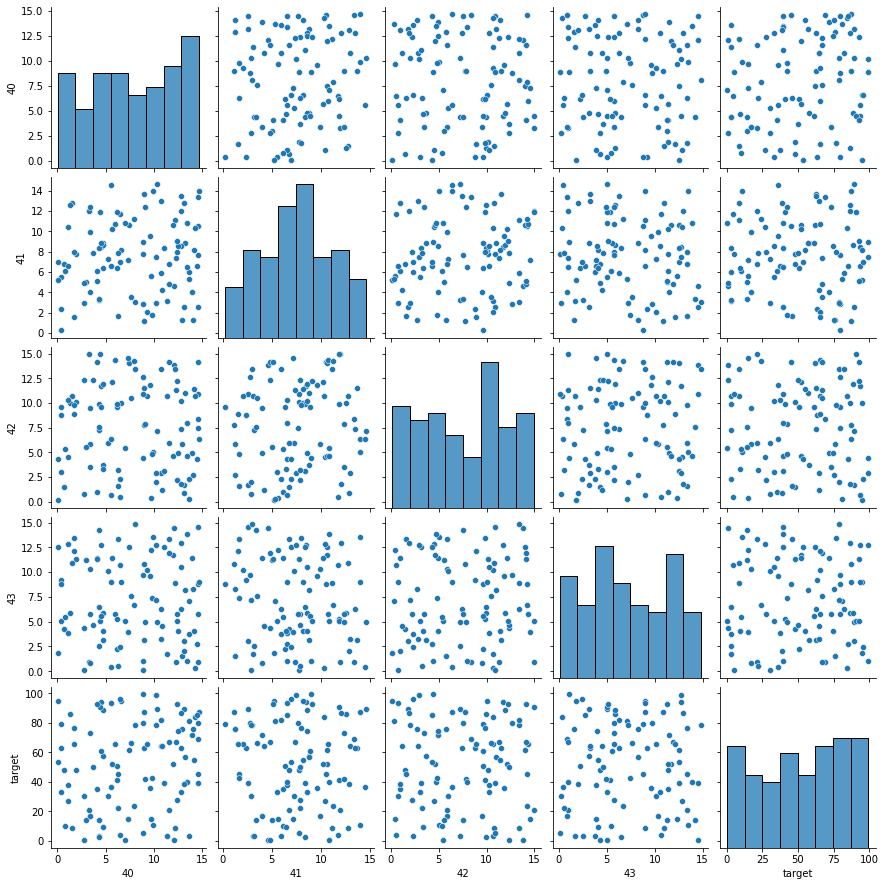

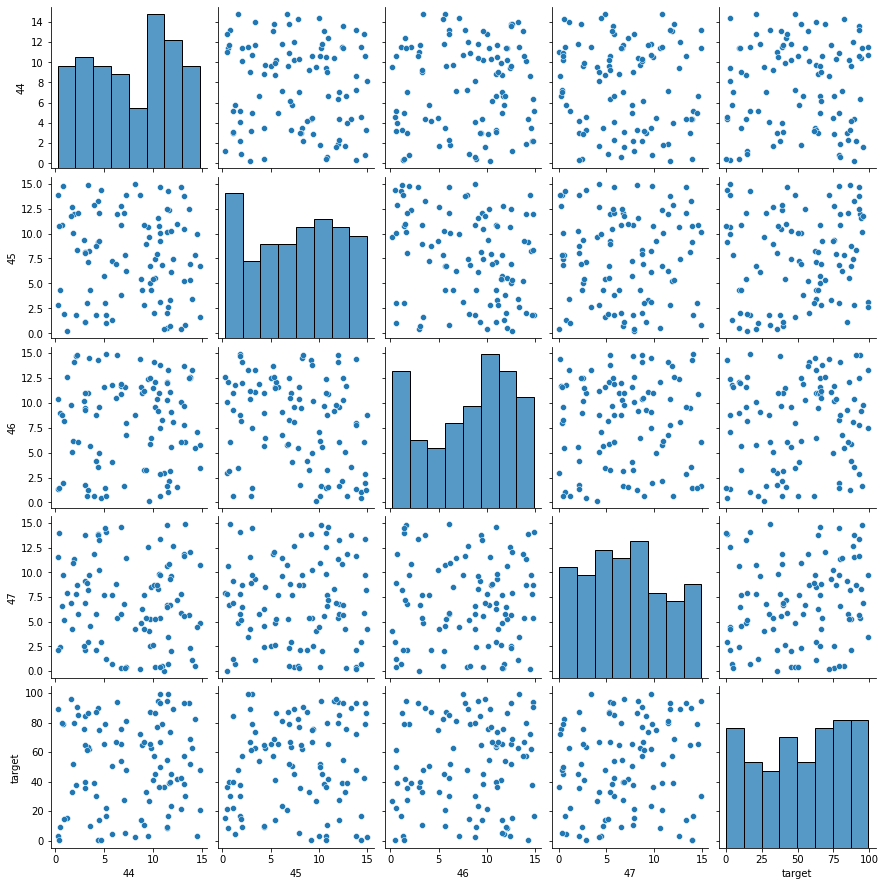

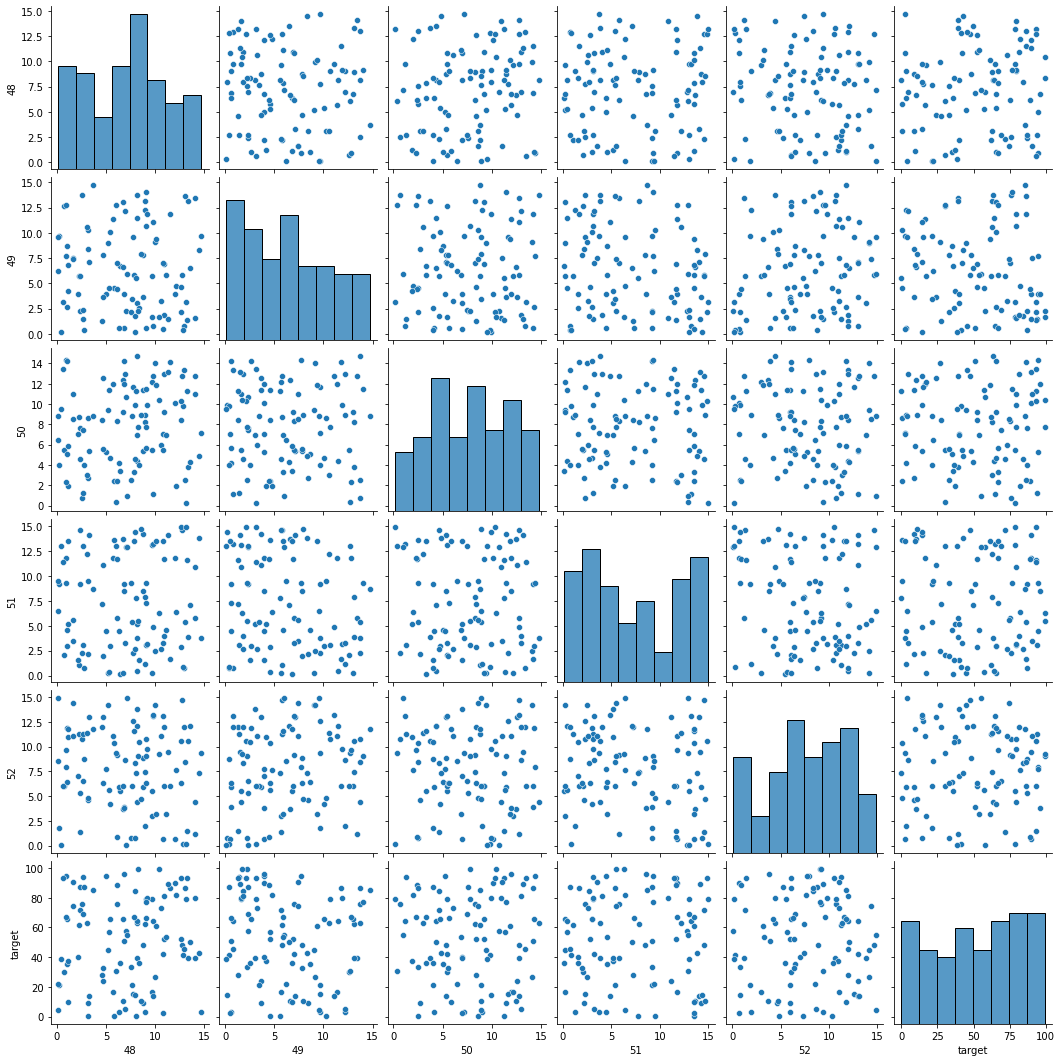

In [226]:
#plotting pairwise relationships between every feature and "target".this step is gonna help us to identify useless features
for i in range(batch_num):
    print("Chunk in progress: ", i)
    sns.pairplot(data=col_sets[i])

### now we see that most of the features have random relationship with "target"
### but feature  "6" and "target" definitely have some quadratic dependance
### feature "8" is a mess becuse of the binary values it contains, but I'd like to see what this mess is about

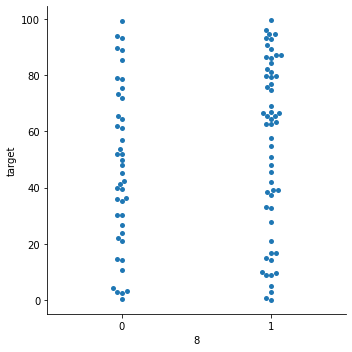

In [227]:
sns.catplot(data=df_sample, x="8", y="target", kind="swarm")

<AxesSubplot:xlabel='6', ylabel='target'>

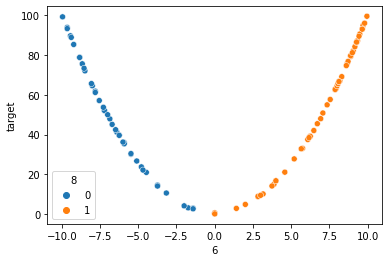

In [255]:
sns.scatterplot(data=df_sample, x="6", y="target", hue="8")

### now we see that basically feature "8" is an indicator whether  value of feature "6" is positive or zero (1) or is negative (0)

<AxesSubplot:xlabel='6', ylabel='target'>

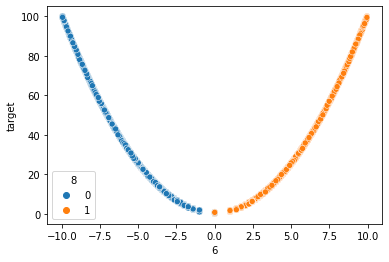

In [258]:
#creating a potential dataframe that contains two features "6", "8" and "target". 
potential_df = df[["6", "8", "target"]]
sns.scatterplot(data=potential_df, x="6", y="target", hue="8")

In [260]:
#making sure correlation between "6" and "8" is huge(which is obvious as far as feature "8" is an indicator of feature "6")
potential_df.corr()

,6,8,target
6,1.000000,0.940016,0.000666
8,0.940016,1.000000,0.000347
target,0.000666,0.000347,1.000000


<AxesSubplot:>

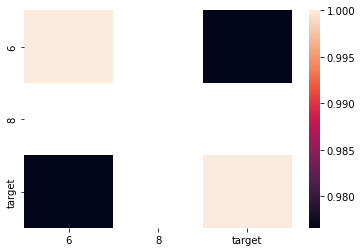

In [231]:
sns.heatmap(potential_df.corr())

### as far as feature "8" is an indicator of feature "6" we don't need this feature in our learning model
### a perfect positive correlation between two features can lead to problems because it violates one of the assumptions of linear regression, which is the assumption of no perfect multicollinearity



### LinearRegression. Try 1

In [5]:
#splitting our data into train and test subsets(80% - train set, 20% - test set)
from sklearn.model_selection import train_test_split

X = df[["6"]] #independent variables
y = df["target"] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression() #bulding the model

lm1.fit(X_train, y_train) #fitting train data to the model

pred = lm1.predict(X_test) #predicting the dependent value y_test using X_test

pred

array([50.13548338, 50.11735529, 50.1401069 , ..., 50.1430239 ,
       50.1323069 , 50.11769359])

In [8]:
from sklearn.metrics import mean_squared_error
import math

rmse_lm1 = mean_squared_error(y_test, pred, squared=False)
rmse_lm1

6.232250282473156

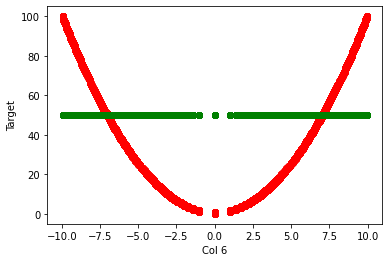

In [277]:
plt.scatter(X_test, y_test, color = "red")
plt.scatter(X_test, pred, color = "green")
# plt.plot(X_test, pd.DataFrame(pred, columns=["target"]), color = "green")
plt.xlabel("Col 6")
plt.ylabel("Target")
plt.show()


In [287]:
#checking how lm1 model works on the same data it was trained with
lm1_train = LinearRegression() 

lm1_train.fit(X_train, y_train)

pred_train = lm1_train.predict(X_train)
rmse_lm1_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_lm1_train

0.2887884237123276

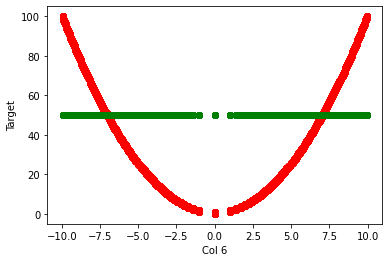

In [280]:
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, pred_train, color = "green")
# plt.plot(X_test, pd.DataFrame(pred, columns=["target"]), color = "green")
plt.xlabel("Col 6")
plt.ylabel("Target")
plt.show()


#### we can definitely see a problem here. linear regression works with linear dependence and we have a quadratic one

### LinearRegression. Try 2 (success)

In [28]:
df = pd.read_csv("internship_train.csv")

#df["6"] = df["6"].apply(abs) #the abs value of each element in the column is assigned back to the same column
X = df[["6"]].copy() #we use the copy() method to create a new copy of the "6" column from df and assign it to X

X["6**2"] = X["6"]**2
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()

lm2.fit(X_train, y_train)

pred = lm2.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
rmse

0.28842997013201205

In [29]:
X


,6,6**2
0,-4.472136,20.0
1,7.810250,61.0
2,8.602325,74.0
3,8.306624,69.0
4,8.124038,66.0
...,...,...
89995,4.898979,24.0
89996,-3.605551,13.0
89997,6.164414,38.0
89998,-3.605551,13.0


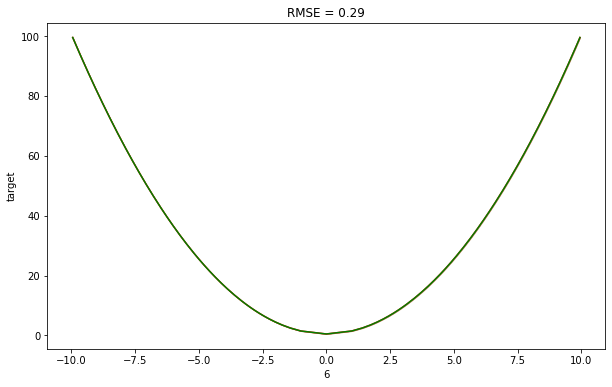

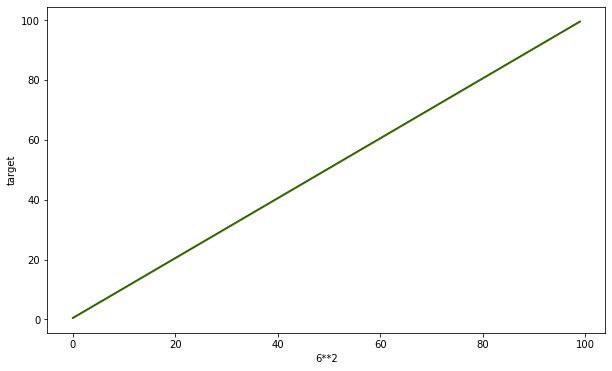

In [35]:
df_test = X_test
df_test["target"] = y_test

df_pred = X_test
df_pred["target"] = pred


plt.figure(figsize=(10, 6))
sns.lineplot(df_test, x="6", y="target", color = "red")
sns.lineplot(df_pred, x="6", y="target", color = "green")
# plt.plot(X_test, pd.DataFrame(pred, columns=["target"]), color = "green")
plt.title(f"RMSE = {rmse:.2f}")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(df_test, x="6**2", y="target", color = "red")
sns.lineplot(df_pred, x="6**2", y="target", color = "green")
plt.show()

### it is clear that function which connects feature "6" and "target" is very close to y = x^2

### RandomForestRegressor (success)

In [320]:
df = pd.read_csv("internship_train.csv")

X = df[["6"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
lm3 = RandomForestRegressor()

lm3.fit(X_train, y_train)

pred = lm3.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
rmse

0.2890285277698854

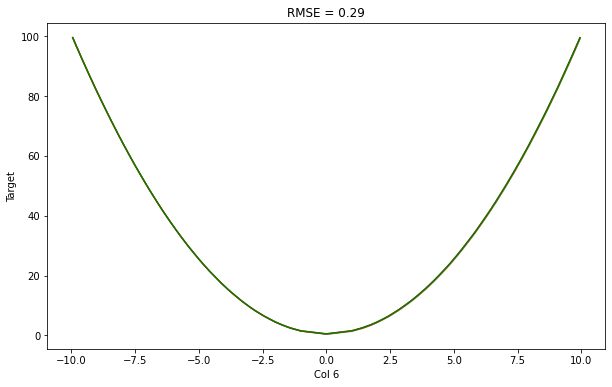

In [321]:
df_test = X_test[["6"]]
df_test["target"] = y_test

df_pred = X_test[["6"]]
df_pred["target"] = pred

# ax = sns.scatterplot(data=df_test, x="6", y="target",
#                      color="black", alpha=0.5)
# ax.plot(df_pred["6"], pred)
# _ = ax.set_title(f"RMSE = {rmse:.2f}")
plt.figure(figsize=(10, 6))
sns.lineplot(df_test, x="6", y="target", color = "red")
sns.lineplot(df_pred, x="6", y="target", color = "green")
# plt.plot(X_test, pd.DataFrame(pred, columns=["target"]), color = "green")
plt.title(f"RMSE = {rmse:.2f}")
plt.xlabel("Col 6")
plt.ylabel("Target")
plt.show()

### Now let's make prediction for out hidden data. I am going to use Lm3 which is based on RandomForestRegressor

In [353]:
df_features = pd.read_csv("internship_hidden_test.csv")

In [354]:
df_features



,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,1.272356,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,2.331195,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,14.423037,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.154640,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367


In [355]:
df_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,248.387400,250.191800,248.064900,249.992200,251.642200,249.678600,-0.079268,0.505215,0.492200,245.823600,...,7.422179,7.488576,7.526853,7.449717,7.438931,7.563141,7.510016,7.465383,7.503378,7.503662
std,144.124521,144.850399,144.792255,144.015371,144.745324,144.677689,7.032273,0.285678,0.499964,142.852057,...,4.335234,4.321760,4.340501,4.328863,4.308985,4.347630,4.353635,4.363206,4.338020,4.291431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000260,0.000000,0.000000,...,0.000310,0.001103,0.000545,0.001244,0.000026,0.001580,0.000286,0.001716,0.000834,0.000132
25%,123.000000,123.000000,123.000000,128.000000,125.000000,124.000000,-7.071068,0.261199,0.000000,122.000000,...,3.707353,3.758763,3.762664,3.711092,3.753059,3.805891,3.734299,3.696070,3.758126,3.810301
50%,249.000000,251.000000,246.000000,252.000000,252.000000,249.000000,-1.000000,0.507519,0.000000,244.000000,...,7.371637,7.531310,7.550432,7.361451,7.377399,7.627437,7.547184,7.441250,7.500340,7.429109
75%,373.000000,377.000000,375.000000,373.000000,379.000000,374.000000,7.071068,0.750603,1.000000,368.000000,...,11.147130,11.193657,11.311366,11.201442,11.154313,11.338666,11.276399,11.297861,11.268075,11.209570
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999982,1.000000,499.000000,...,14.997599,14.999511,14.999954,14.998273,14.998069,14.999790,14.999314,14.999992,14.998473,14.997318


In [356]:
pred = lm3.predict(df_features[["6"]])
pred

array([11.49324447, 79.5219404 ,  7.51404068, ..., 22.48597699,
       16.48524585, 91.49161317])

In [350]:
pred_df = pd.DataFrame(pred)
pred_df.columns = ["target"]

pred_df

,target
0,11.493244
1,79.521940
2,7.514041
3,38.516067
4,64.511306
...,...
9995,45.530514
9996,32.512732
9997,22.485977
9998,16.485246


In [357]:
df_final = pd.concat([df_features, pred_df], axis = 1)
df_final

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191,11.493244
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604,79.521940
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030,7.514041
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819,38.516067
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015,64.511306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558,45.530514
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093,32.512732
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801,22.485977
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367,16.485246


<AxesSubplot:xlabel='6', ylabel='target'>

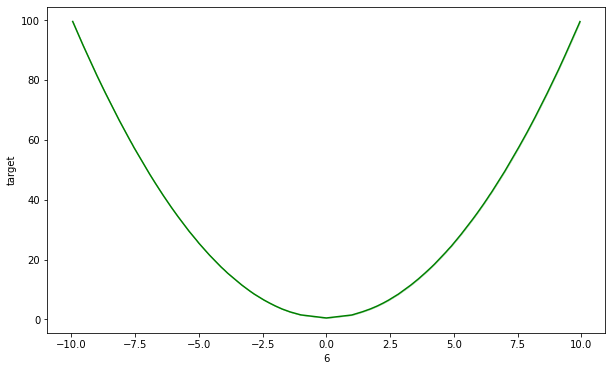

In [344]:
plt.figure(figsize=(10, 6))
sns.lineplot(df_final, x="6", y="target", color = "green")